In [392]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns

# Pandas
pd.set_option("display.max_rows",100)
pd.set_option('display.max_columns', 50)

# Matplotlib
%matplotlib inline
mpl.rcParams['figure.figsize'] = (20, 8)

In [393]:
cereals = pd.read_csv('../data/pycon.csv')
cereals = cereals.set_index('cf_index')

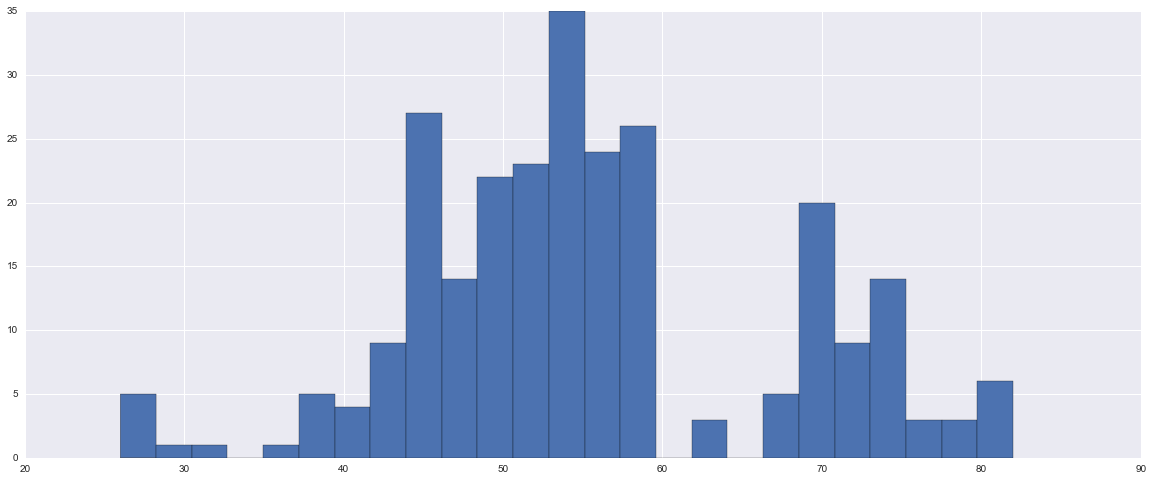

In [394]:
cereals.cf_score.hist(bins=25);

In [395]:
cereals['healthy'] = (cereals.cf_score >  60).astype(int)

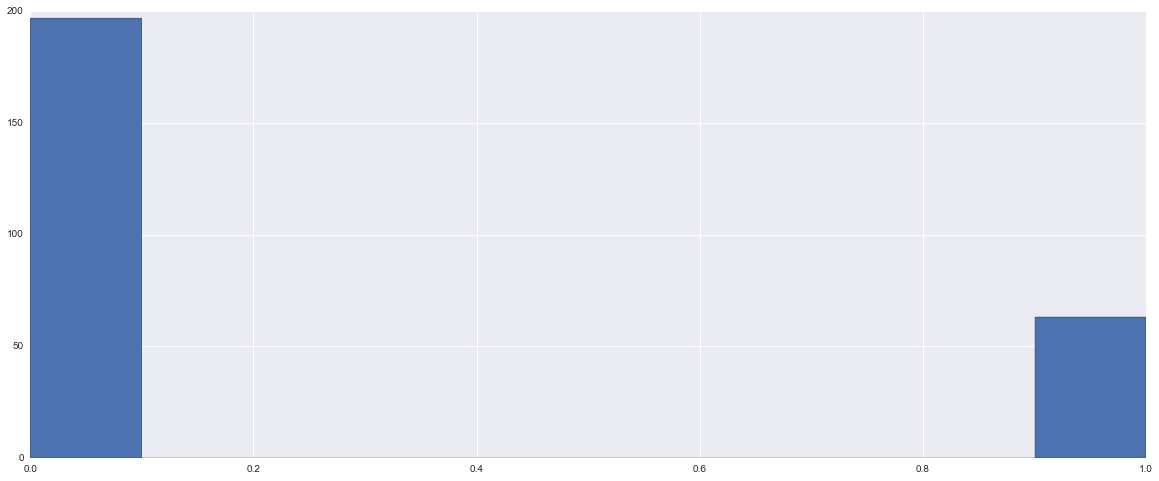

In [396]:
cereals['healthy'].hist();

## Colour Mean, Standard Deviation

## Histograms

### Greyscale

### RGB

## Dominant Colours

## Intensity

## Colour Wheel

## White Background

# Machine Learning

## Spokes Characters

## Gaze Detection

## Modeling

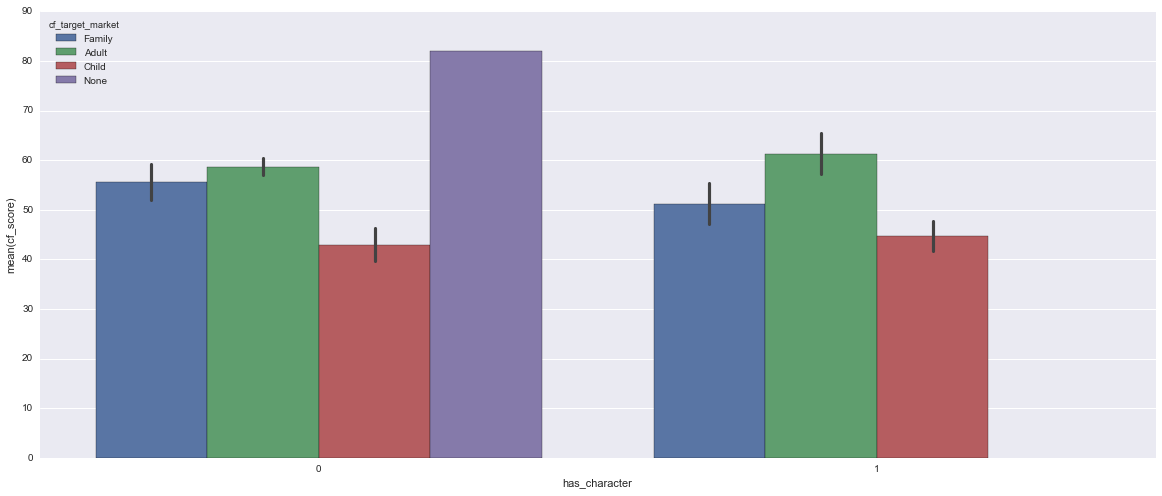

In [397]:
sns.barplot(x="has_character", y="cf_score", hue='cf_target_market', data=cereals, order=[0,1]);

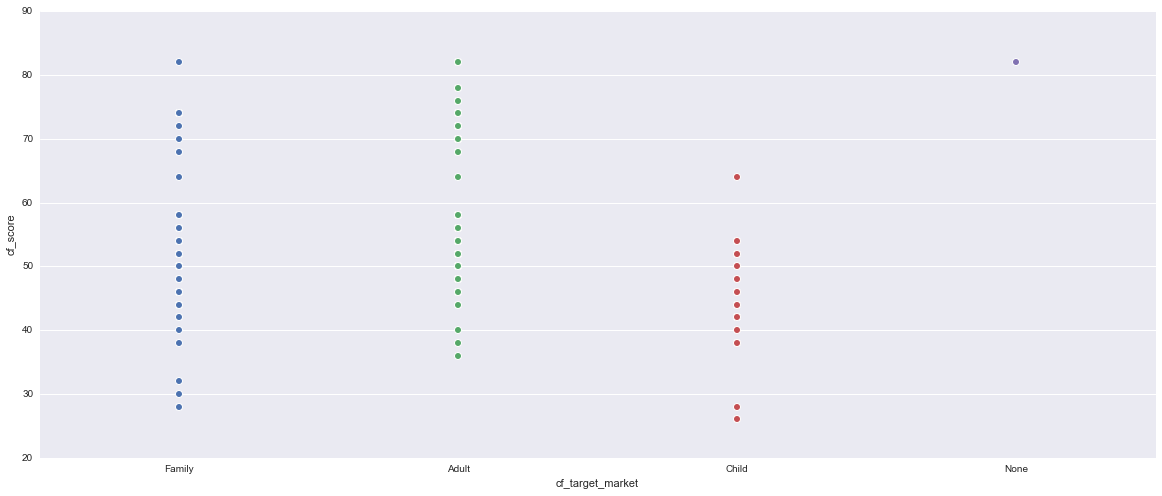

In [398]:
sns.stripplot(x="cf_target_market", y="cf_score", data=cereals);

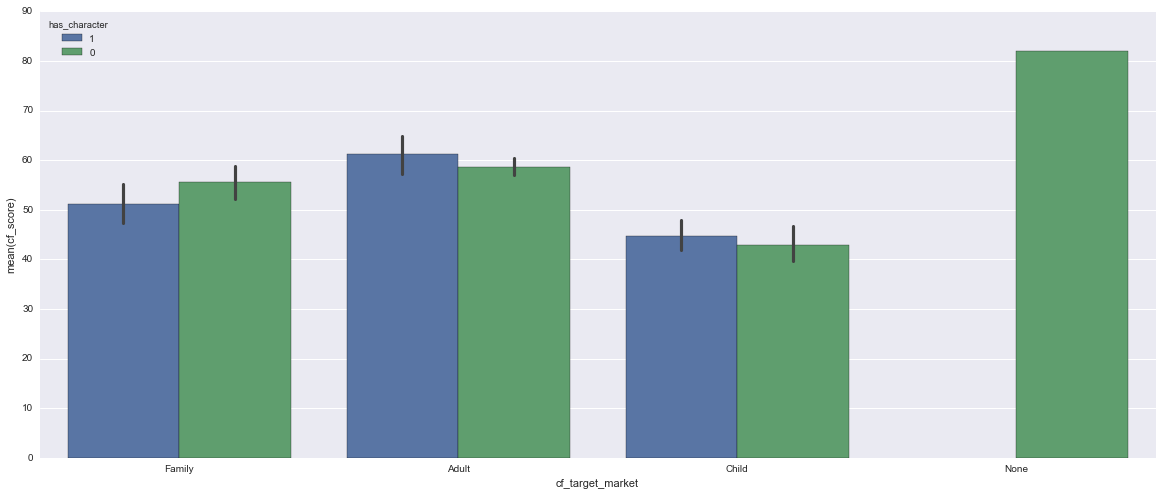

In [399]:
sns.barplot(x="cf_target_market", y="cf_score", hue='has_character', data=cereals);

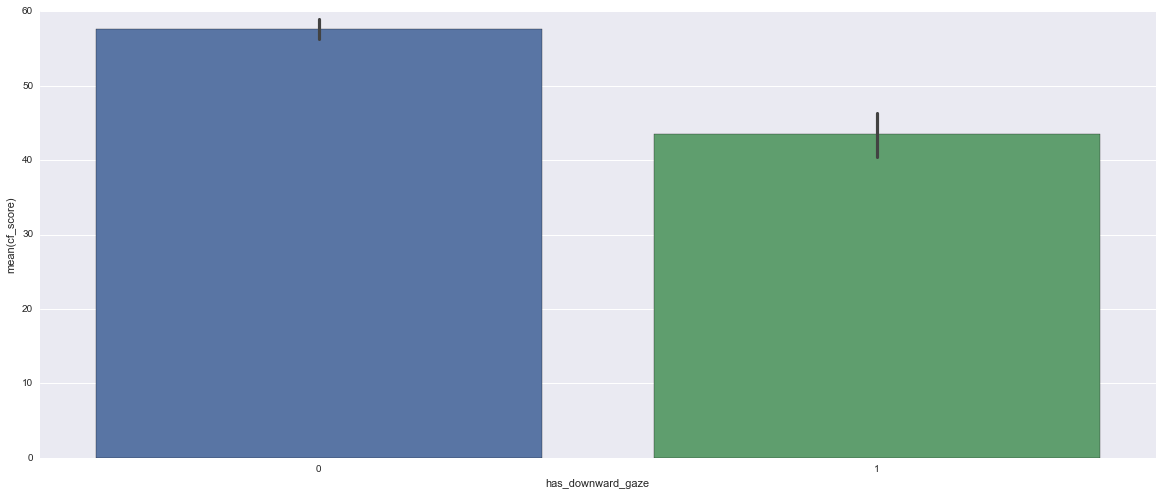

In [400]:
sns.barplot(x="has_downward_gaze", y="cf_score", data=cereals, order=[0,1]);

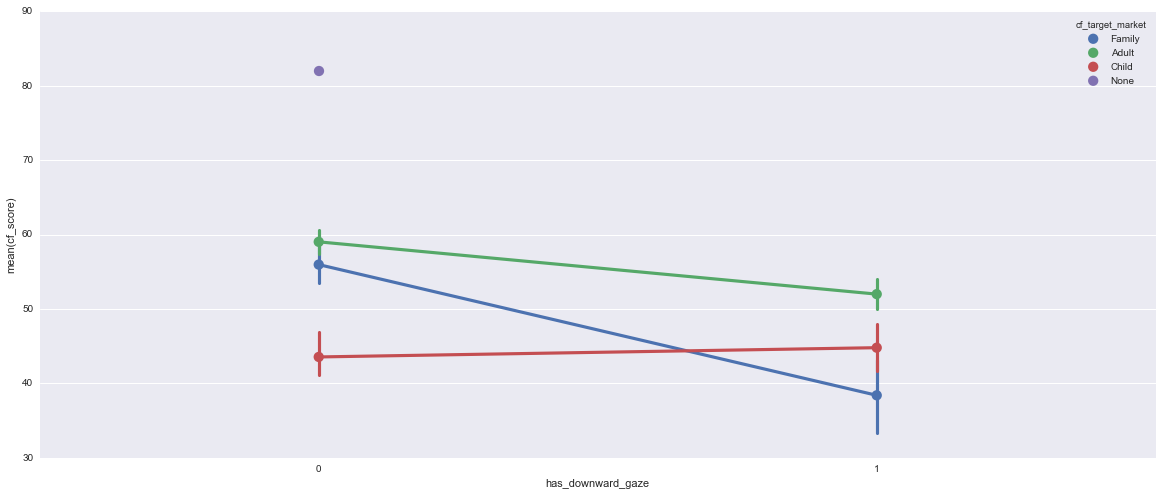

In [401]:
sns.pointplot(x="has_downward_gaze", y="cf_score", hue='cf_target_market', data=cereals);

### Cleaning Data

In [402]:
cereals[cereals.cf_target_market == 'None']

,cf_score,cf_target_market,cf_serving_size,cf_sugar_result,cf_fiber_result,cf_sodium_result,cf_sugar_per_serving,cf_fiber_per_serving,cf_sodium_per_serving,cf_calories_per_serving,has_white_bg,has_character,has_downward_gaze,greyscale_peak,b_mean,g_mean,r_mean,b_sd,g_sd,r_sd,most_frequent_colour,most_frequent_colour_count,most_dominant_colour,url,cover_image_url,fn,fn_cropped,company,healthy
cf_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
172,82,None,19,0%,5%,0,0,1,0,70,1,0,0,255,194.23,197.81,207.99,82.38,79.5,67.29,#ffffff,51273,white,http://cerealfacts.org/cereal_nutrition_scores...,http://cerealfacts.org/media/cereal_images/Kas...,img_172_kashipuffs7wholegrainspuffs.jpg,img_172_kashipuffs7wholegrainspuffs_cropped.png,Kashi,1


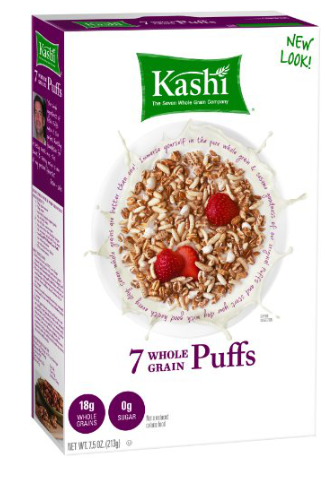

In [403]:
img = mpimg.imread('../img/' + cereals.ix[172].fn)

plt.grid(None)
plt.axis('off')
imgplot = plt.imshow(img)

In [404]:
cereals.ix[172, 'cf_target_audience'] = 'Adult'

In [405]:
cereals = cereals.join(pd.get_dummies(cereals.cf_target_market.str.lower(), prefix='is'))
target_audience = ['is_adult', 'is_child', 'is_family', 'is_none']

In [406]:
cereals.healthy.value_counts()

0    197
1     63
Name: healthy, dtype: int64

In [407]:
import random

min_class = cereals.healthy.value_counts().idxmin()
max_class = cereals.healthy.value_counts().idxmax()
min_class_count = sum(cereals.healthy == min_class)
max_class_count = sum(cereals.healthy == max_class)

min_idx = cereals[cereals.healthy == min_class].index.tolist()
max_sample_idx = random.sample(cereals[cereals.healthy == max_class].index, min_class_count)

balanced_cereals = cereals.ix[min_idx + max_sample_idx]

In [408]:
len(balanced_cereals)

126

In [409]:
cereals.columns

Index([u'cf_score', u'cf_target_market', u'cf_serving_size',
       u'cf_sugar_result', u'cf_fiber_result', u'cf_sodium_result',
       u'cf_sugar_per_serving', u'cf_fiber_per_serving',
       u'cf_sodium_per_serving', u'cf_calories_per_serving', u'has_white_bg',
       u'has_character', u'has_downward_gaze', u'greyscale_peak', u'b_mean',
       u'g_mean', u'r_mean', u'b_sd', u'g_sd', u'r_sd',
       u'most_frequent_colour', u'most_frequent_colour_count',
       u'most_dominant_colour', u'url', u'cover_image_url', u'fn',
       u'fn_cropped', u'company', u'healthy', u'cf_target_audience',
       u'is_adult', u'is_child', u'is_family', u'is_none'],
      dtype='object')

In [410]:
feat = ['has_character','has_white_bg']

X = balanced_cereals[feat]
y = balanced_cereals.healthy.values

In [416]:
from sklearn.metrics import r2_score
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import ExtraTreesClassifier as ETC
from sklearn.metrics import confusion_matrix

est = ETC(n_estimators=150,  max_features='auto',
                            min_samples_split=5)

est.fit(X, y)

y_hat = est.predict(X)

cross_val_score(est, X, y, cv=5)

array([ 0.34615385,  0.46153846,  0.46153846,  0.41666667,  0.375     ])

In [412]:
y_hat

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [413]:
confusion_matrix(y, y_hat)

array([[18, 45],
       [13, 50]])